<a href="https://colab.research.google.com/github/sven-vanpoucke/hello-world/blob/main/Air_Pollution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Project Datos Masivos - Air Pollution (Anthony)</h1>

<p>This Jupyter notebook is an interactive document that combines both text and code, focusing on the retrieval and utilization of air pollution data in the Madrid Community.</p>

<h2>Table of content</h2>

- **Introduction**
    - Imports of packages
- **Preprocessing of the data**
    - Data Collection
        - Parameters
        - Generate url
        - Call the api
        - Check if the delivered data looks fine
    - Data Exploration
        - Which features do we have?
        - Detect Unique Value Features
    - Data Transformation
        - Transform the date
        - Add Location Description
        - Scores & rescaling (later?)
        - Transform to a pivot table
        - Metric: Average
- **Business Value of the data**
    - Define data of the laws.
    - General overview
        - One graph of the last 24 hours per parameter. Every graph displays all locations.
        - One graph of with 'the average value per hour' per parameter. Every graph displays all locations.
    - Answer by user request
        -

<h2>Information about the data</h2>
<p>We're using data from openaq. OpenAQ is a global open platform that collects and provides access to air quality and atmospheric data from around the world, promoting transparency and collaboration in monitoring air pollution. It enables researchers, policymakers, and the public to access and analyze real-time air quality information to address environmental and health challenges.</p>

<h2> Introduction </h2>

<h3> Import of Packages </h3>
<p> Setting Up the Toolkit: Importing Essential Packages. </p>

In [17]:
# Import the 'urlencode' function from the 'urllib.parse' module for constructing API query parameters
from urllib.parse import urlencode

# Import the 'requests' module for making API calls
import requests

# Import the 'pandas' library for data manipulation and analysis
import pandas as pd

# Import the 'tabulate' library for creating well-formatted tables
from tabulate import tabulate

# Import the 'matplotlib' and 'seaborn' libraries for data visualization, including graphs and plots
import matplotlib.pyplot as plt
import seaborn as sns

# Import the 'datetime' librarie to get the current date
from datetime import datetime

# Import the 'relativedelta' librarie to calculate differences between dates
from dateutil.relativedelta import relativedelta
from datetime import timedelta

# Print a confirmation message indicating that the import process was successful
print("Imports successfully finished")

Imports successfully finished


<h2> Preprocessing of the data </h2>

<h3> Data Collection </h3>

- Parameters
- Generate url
- Call the api
- Check if the delivered data looks fine

<h4> Parameters </h4>
<p> Based on the documentation we know which parameters to define for the api. (https://explore.openaq.org/) </p>


    - Location: The unique ID of the measurement point.
    - Parameter: The type of particles or substances to retrieve.
    - Date From: Start date for data retrieval.
    - Date To: End date for data retrieval.
    - Limit: Maximum number of data lines to return.

<p>  
The dictionary contains unique IDs as keys, each corresponding to a specific measurement point, and the associated values represent the names or labels of those measurement points.
</p>

In [2]:
datetime.now().strftime('%Y-%m-%dT%H:%M:%S%z')

'2023-10-26T21:20:09'

In [3]:
location_mapping = {
    4247: 'Casa De Campo',
    3364: 'Alcorcon',
    3265: 'Leganes',
    4338: 'Getafe',
    4328: 'Plaza Eliptica',
    4270: 'Valdemoro',
    4323: 'Retiro',
    4331: 'Arganzuela',
    4275: 'Rios Rosas East',
    4285: 'Rios Rosas West',
    74321: 'UCM',
    4320: 'Plaza Castilla',
    4296: 'Sanchinarro',
    4280: 'Collado Villalba',
    4244: 'Algete',
    4283: 'Coslada',
    4288: 'Torrejon de Ardoz',
    3367: 'Alcala De Henares',
    4265: 'Villarejo de Salvanes',
}


# datetime.now().strftime('%Y-%m-%dT%H:%M:%S%z'),
# Define your parameters
parameters = {
    'parameter': ['pm25', 'no2', 'o3', 'pm10'], # co, so2, no
    'date_from': '2023-5-1T00:00:00+02:00',
    'date_to': '2023-11-1T00:00:00+02:00',
    'limit': 5000
}

# Generate URL (based on the documentation of openaq)
base_url = "https://api.openaq.org/v2/measurements"

# Define the headers for the call
headers = {"accept": "application/json"}

# Initialize a dictionary to store data for each location
all_data = []

# Iterate over location IDs from the location_mapping dictionary
for location_id in location_mapping.keys():
    # Update the 'location_id' parameter for the specific location
    parameters['location_id'] = [location_id]

    # Encode the parameters into a query string
    query_string = urlencode(parameters, doseq=True)

    # Build the complete URL for the specific location
    url = f"{base_url}?{query_string}"

    # Call the API for the specific location
    response = requests.get(url, headers=headers)

    if response.status_code == 200:
        print(f"Succesfully collected data for location {location_mapping[location_id]}")

        # Add the location name to the response data
        data = response.json()
        # We addd the locationName
        #for record in data['results']:
        #    record['locationName'] = location_mapping[location_id]

        # Extend the all_data list with the data for this location
        all_data.extend(data['results'])
    else:
        print(f"Something went wrong for location {location_mapping[location_id]}, status code: {response.status_code}")

# Check if the output is looking fine
df = pd.DataFrame(all_data)
df.head()

Succesfully collected data for location Casa De Campo
Succesfully collected data for location Alcorcon
Succesfully collected data for location Leganes
Succesfully collected data for location Getafe
Succesfully collected data for location Plaza Eliptica
Succesfully collected data for location Valdemoro
Succesfully collected data for location Retiro
Succesfully collected data for location Arganzuela
Succesfully collected data for location Rios Rosas East
Succesfully collected data for location Rios Rosas West
Succesfully collected data for location UCM
Succesfully collected data for location Plaza Castilla
Succesfully collected data for location Sanchinarro
Succesfully collected data for location Collado Villalba
Succesfully collected data for location Algete
Succesfully collected data for location Coslada
Succesfully collected data for location Torrejon de Ardoz
Succesfully collected data for location Alcala De Henares
Succesfully collected data for location Villarejo de Salvanes


,locationId,location,parameter,value,date,unit,coordinates,country,city,isMobile,isAnalysis,entity,sensorType
0,4247,ES1611A,pm10,1.0,"{'utc': '2023-10-26T17:00:00+00:00', 'local': ...",µg/m³,"{'latitude': 40.033277777471, 'longitude': -3....",ES,None,False,None,Governmental Organization,reference grade
1,4247,ES1611A,o3,30.0,"{'utc': '2023-10-26T17:00:00+00:00', 'local': ...",µg/m³,"{'latitude': 40.033277777471, 'longitude': -3....",ES,None,False,None,Governmental Organization,reference grade
2,4247,ES1611A,no2,10.0,"{'utc': '2023-10-26T17:00:00+00:00', 'local': ...",µg/m³,"{'latitude': 40.033277777471, 'longitude': -3....",ES,None,False,None,Governmental Organization,reference grade
3,4247,ES1611A,pm10,12.0,"{'utc': '2023-10-26T16:00:00+00:00', 'local': ...",µg/m³,"{'latitude': 40.033277777471, 'longitude': -3....",ES,None,False,None,Governmental Organization,reference grade
4,4247,ES1611A,no2,7.0,"{'utc': '2023-10-26T16:00:00+00:00', 'local': ...",µg/m³,"{'latitude': 40.033277777471, 'longitude': -3....",ES,None,False,None,Governmental Organization,reference grade


<h3> Data Exploration </h3>

<p>Doesn't do any modification to the data. Can be skipped if not interested in anymore.</p>

- Which features do we have?
- Detect Unique Value Features

<h4> Which features do we have? </h4>

In [4]:
print(df.columns) # Showing which columns we have

Index(['locationId', 'location', 'parameter', 'value', 'date', 'unit',
       'coordinates', 'country', 'city', 'isMobile', 'isAnalysis', 'entity',
       'sensorType'],
      dtype='object')


<h4> Detect Unique Value Features </h4>

In [5]:
print("\Values of parameter:", df['parameter'].unique())

print("\n Values of unit:", df['unit'].unique())

print("\n Values of isMobile:", df['isMobile'].unique())

print("\n Values of isAnalysis:", df['isAnalysis'].unique())

print("\n Values of entity:", df['entity'].unique())

print("\n Values of sensorType:", df['sensorType'].unique())

\Values of parameter: ['pm10' 'o3' 'no2' 'pm25']

 Values of unit: ['µg/m³']

 Values of isMobile: [False]

 Values of isAnalysis: [None]

 Values of entity: ['Governmental Organization' 'Community Organization']

 Values of sensorType: ['reference grade' 'low-cost sensor']


<h3> Data Transformation </h3>

- Transform the date
- Add Location Description
- Scores & rescaling (later?)
- Transform to a pivot table
- Average by hour of the day


<h4> Transform the date </h4>

In [6]:
# Check if the 'date' column exists in the DataFrame
if 'date' in df.columns:
    # Extract the 'local' value from the dictionary and assign it to 'localTime'
    df['localTime'] = df['date'].apply(lambda x: x['local'])

    # Convert 'localTime' to a datetime object
    df['localTime'] = pd.to_datetime(df['localTime'], format='%Y-%m-%dT%H:%M:%S%z')

    # Check if the 'localTime' column now exists in the DataFrame
    if 'localTime' in df.columns:
        print("Date successfully transformed to localTime")

    # Find the lowest and highest 'localTime' values
    lowest_localTime = df['localTime'].min()
    highest_localTime = df['localTime'].max()

    # 'strftime' converts the datetime to something that is readable for humans
    print(f"Lowest localTime: {lowest_localTime.strftime('%d-%m-%Y %H:%M')}")
    print(f"Highest localTime: {highest_localTime.strftime('%d-%m-%Y %H:%M')}")

df.head()

Date successfully transformed to localTime
Lowest localTime: 11-07-2023 04:00
Highest localTime: 26-10-2023 22:00


,locationId,location,parameter,value,date,unit,coordinates,country,city,isMobile,isAnalysis,entity,sensorType,localTime
0,4247,ES1611A,pm10,1.0,"{'utc': '2023-10-26T17:00:00+00:00', 'local': ...",µg/m³,"{'latitude': 40.033277777471, 'longitude': -3....",ES,None,False,None,Governmental Organization,reference grade,2023-10-26 19:00:00+02:00
1,4247,ES1611A,o3,30.0,"{'utc': '2023-10-26T17:00:00+00:00', 'local': ...",µg/m³,"{'latitude': 40.033277777471, 'longitude': -3....",ES,None,False,None,Governmental Organization,reference grade,2023-10-26 19:00:00+02:00
2,4247,ES1611A,no2,10.0,"{'utc': '2023-10-26T17:00:00+00:00', 'local': ...",µg/m³,"{'latitude': 40.033277777471, 'longitude': -3....",ES,None,False,None,Governmental Organization,reference grade,2023-10-26 19:00:00+02:00
3,4247,ES1611A,pm10,12.0,"{'utc': '2023-10-26T16:00:00+00:00', 'local': ...",µg/m³,"{'latitude': 40.033277777471, 'longitude': -3....",ES,None,False,None,Governmental Organization,reference grade,2023-10-26 18:00:00+02:00
4,4247,ES1611A,no2,7.0,"{'utc': '2023-10-26T16:00:00+00:00', 'local': ...",µg/m³,"{'latitude': 40.033277777471, 'longitude': -3....",ES,None,False,None,Governmental Organization,reference grade,2023-10-26 18:00:00+02:00


<h4> Add Location Description </h4>

In [7]:
#Uses location_mapping defined before
df['locationName'] = df['locationId'].map(location_mapping)
print("Succesfully finished")

Succesfully finished


<h4> Scores & rescaling (later?) </h4>
<p>To be added in a later stage.</p>

<h4>Transform to a pivot table</h4>
<p> We'd like multiple pivot tables with each a subset of the data and  a unique combination of location and time. And the values of all the parameters.
</p>

Dataframes we'd like to have:

- pivot_df = All Data
- last_24_hours_pivot_df
- last_1_week_pivot_df
- last_1_year_pivot_df

<h5> df = All Data </h5>
<p> Working fine </p>

In [8]:
# Calculate the timestamp for 24 hours ago in the same timezone as 'localTime'

# Pivot the shortened DataFrame to display data in the desired format
pivot_df = df.pivot_table(index=['localTime', 'locationName',], columns='parameter', values='value').reset_index()

# Print the data for the last 24 hours
pivot_df.head()

parameter,localTime,locationName,no2,o3,pm10,pm25
0,2023-07-11 04:00:00+02:00,Rios Rosas East,54.0,NaN,NaN,NaN
1,2023-07-11 05:00:00+02:00,Rios Rosas East,22.0,NaN,23.0,16.0
2,2023-07-11 06:00:00+02:00,Rios Rosas East,15.0,NaN,16.0,8.0
3,2023-07-11 07:00:00+02:00,Rios Rosas East,18.0,NaN,19.0,10.0
4,2023-07-11 08:00:00+02:00,Rios Rosas East,42.0,NaN,27.0,14.0


<h5> last_24_hours_pivot_df </h5>
<p> Working fine </p>

In [9]:
# Calculate the timestamp for 24 hours ago in the same timezone as 'localTime'
now = datetime.now(df['localTime'].iloc[0].tzinfo)  # Use the timezone from the first timestamp
twenty_four_hours_ago = now - timedelta(hours=24)

# Filter the DataFrame to include only the data from the last 24 hours
last_24_hours_df = df[df['localTime'] >= twenty_four_hours_ago]

# Pivot the shortened DataFrame to display data in the desired format
last_24_hours_pivot_df = last_24_hours_df.pivot_table(index=['localTime', 'locationName',], columns='parameter', values='value').reset_index()

# Print the data for the last 24 hours
last_24_hours_df.head()

,locationId,location,parameter,value,date,unit,coordinates,country,city,isMobile,isAnalysis,entity,sensorType,localTime,locationName
0,4247,ES1611A,pm10,1.0,"{'utc': '2023-10-26T17:00:00+00:00', 'local': ...",µg/m³,"{'latitude': 40.033277777471, 'longitude': -3....",ES,None,False,None,Governmental Organization,reference grade,2023-10-26 19:00:00+02:00,Casa De Campo
1,4247,ES1611A,o3,30.0,"{'utc': '2023-10-26T17:00:00+00:00', 'local': ...",µg/m³,"{'latitude': 40.033277777471, 'longitude': -3....",ES,None,False,None,Governmental Organization,reference grade,2023-10-26 19:00:00+02:00,Casa De Campo
2,4247,ES1611A,no2,10.0,"{'utc': '2023-10-26T17:00:00+00:00', 'local': ...",µg/m³,"{'latitude': 40.033277777471, 'longitude': -3....",ES,None,False,None,Governmental Organization,reference grade,2023-10-26 19:00:00+02:00,Casa De Campo
3,4247,ES1611A,pm10,12.0,"{'utc': '2023-10-26T16:00:00+00:00', 'local': ...",µg/m³,"{'latitude': 40.033277777471, 'longitude': -3....",ES,None,False,None,Governmental Organization,reference grade,2023-10-26 18:00:00+02:00,Casa De Campo
4,4247,ES1611A,no2,7.0,"{'utc': '2023-10-26T16:00:00+00:00', 'local': ...",µg/m³,"{'latitude': 40.033277777471, 'longitude': -3....",ES,None,False,None,Governmental Organization,reference grade,2023-10-26 18:00:00+02:00,Casa De Campo


<h5> last_1_week_pivot_df </h5>
<p> Working fine </p>

In [10]:
# Calculate the timestamp for one week ago in the same timezone as 'localTime'
now = datetime.now(df['localTime'].iloc[0].tzinfo)  # Use the timezone from the first timestamp
one_week_ago = now - timedelta(weeks=1)

# Filter the DataFrame to include only the data from the last week
last_1_week_df = df[df['localTime'] >= one_week_ago]

# Pivot the shortened DataFrame to display data in the desired format
last_1_week_pivot_df = last_1_week_df.pivot_table(index=['localTime', 'locationName'], columns='parameter', values='value').reset_index()

# Print the data for the last week
last_1_week_pivot_df.head(10)

parameter,localTime,locationName,no2,o3,pm10,pm25
0,2023-10-20 00:00:00+02:00,Algete,NaN,NaN,NaN,5.0
1,2023-10-20 00:00:00+02:00,Getafe,NaN,NaN,3.0,NaN
2,2023-10-20 00:00:00+02:00,Plaza Castilla,NaN,NaN,6.0,4.0
3,2023-10-20 00:00:00+02:00,Plaza Eliptica,11.0,NaN,NaN,NaN
4,2023-10-20 00:00:00+02:00,Rios Rosas East,1.0,NaN,10.0,NaN
5,2023-10-20 00:00:00+02:00,Rios Rosas West,11.0,NaN,NaN,8.0
6,2023-10-20 00:00:00+02:00,Torrejon de Ardoz,NaN,76.0,8.0,NaN
7,2023-10-20 00:00:00+02:00,UCM,NaN,NaN,0.0,0.0
8,2023-10-20 00:00:00+02:00,Villarejo de Salvanes,NaN,NaN,NaN,1.0
9,2023-10-20 01:00:00+02:00,UCM,NaN,NaN,0.0,0.0


<h5> last_1_year_pivot_df </h5>
<p> Working fine </p>

In [11]:
# Calculate the timestamp for one week ago in the same timezone as 'localTime'
now = datetime.now(df['localTime'].iloc[0].tzinfo)  # Use the timezone from the first timestamp
one_year_ago = now - timedelta(weeks=52)

# Filter the DataFrame to include only the data from the last week
last_1_year_df = df[df['localTime'] >= one_year_ago]

# Pivot the shortened DataFrame to display data in the desired format
last_1_year_pivot_df = last_1_year_df.pivot_table(index=['localTime', 'locationName'], columns='parameter', values='value').reset_index()

# Print the data for the last week
last_1_year_pivot_df.head(10)

parameter,localTime,locationName,no2,o3,pm10,pm25
0,2023-07-11 04:00:00+02:00,Rios Rosas East,54.0,NaN,NaN,NaN
1,2023-07-11 05:00:00+02:00,Rios Rosas East,22.0,NaN,23.0,16.0
2,2023-07-11 06:00:00+02:00,Rios Rosas East,15.0,NaN,16.0,8.0
3,2023-07-11 07:00:00+02:00,Rios Rosas East,18.0,NaN,19.0,10.0
4,2023-07-11 08:00:00+02:00,Rios Rosas East,42.0,NaN,27.0,14.0
5,2023-07-11 09:00:00+02:00,Rios Rosas East,70.0,NaN,38.0,15.0
6,2023-07-11 10:00:00+02:00,Rios Rosas East,70.0,NaN,57.0,19.0
7,2023-07-11 11:00:00+02:00,Rios Rosas East,65.0,NaN,64.0,19.0
8,2023-07-11 12:00:00+02:00,Rios Rosas East,51.0,NaN,57.0,12.0
9,2023-07-11 13:00:00+02:00,Rios Rosas East,28.0,NaN,44.0,15.0


<h4> Metric: Average </h4>
<p> Some pivot tables of above should be averaged.
</p>

We'll create a few summary tables.

- Based on the last_1_year_pivot_df
    - summary_by_hour_1_year_df: this will give the average value by hour of the day (1-24). This gives insights in good and bad hours.
    - summary_by_day_1_year_df: this will give the average value by day of the month (1-31). What's the worse day of the month. Any relation?
    - summary_by_month_1_year_df: this will give the average value by month of the year (1-12). What's the best month to breath?

- Based on the last_1_week_pivot_df (not yet added)
    - summary_by_day_1_week_df: this will give the average value by day (Monday-Tuesday) of the past day.



In [12]:
# Select only the numeric columns for summary statistics
numeric_columns = ['no2', 'o3', 'pm10', 'pm25']

# Convert 'localTime' to a datetime column (if not already done)
last_1_year_pivot_df['localTime'] = pd.to_datetime(last_1_year_pivot_df['localTime'])

# Calculate summary statistics by hour
summary_by_hour_1_year_df = last_1_year_pivot_df.groupby([last_1_year_pivot_df['localTime'].dt.hour,last_1_year_pivot_df['locationName'] ])[numeric_columns].mean()

print(summary_by_hour_1_year_df)

# Calculate summary statistics by day of the month
summary_by_day_1_year_df = last_1_year_pivot_df.groupby([last_1_year_pivot_df['localTime'].dt.day,last_1_year_pivot_df['locationName'] ])[numeric_columns].mean()

print(summary_by_day_1_year_df)


# Calculate summary statistics by month of the year
summary_by_month_1_year_df = last_1_year_pivot_df.groupby([last_1_year_pivot_df['localTime'].dt.month,last_1_year_pivot_df['locationName'] ])[numeric_columns].mean()

print(summary_by_month_1_year_df)


parameter                              no2         o3       pm10       pm25
localTime locationName                                                     
0         Alcala De Henares      37.928571  49.250000  26.461538  14.250000
          Alcorcon               30.750000  49.625000        NaN   9.857143
          Algete                  6.666667  72.500000        NaN  10.444444
          Arganzuela             47.428571        NaN  28.375000  13.800000
          Casa De Campo          13.285714  45.000000  27.250000        NaN
...                                    ...        ...        ...        ...
23        Sanchinarro            47.422222        NaN  21.179487   9.657895
          Torrejon de Ardoz      32.346154  44.750000  23.636364  10.115385
          UCM                          NaN        NaN   0.000478   0.000478
          Valdemoro              26.371429  49.029412        NaN  16.297297
          Villarejo de Salvanes  25.382353  58.538462        NaN  15.146341

[448 rows x

<h2> Business Value of the data </h2>

<h3> Law </h3>

<p>Baseline values according to Europe</p>

In [13]:
# Define the maximum allowed values according to the law for each parameter
max_allowed_values = {
    'no': 50,
    'no2': 40,
    'co': 10,
    'pm25': 25,
    'pm10': 50,
    'o3': 35
}
print("succes")

succes


<h3> General overview </h3>

- Data graph of last 24 hours.

<h4> Data graph of last 24 hours </h4>

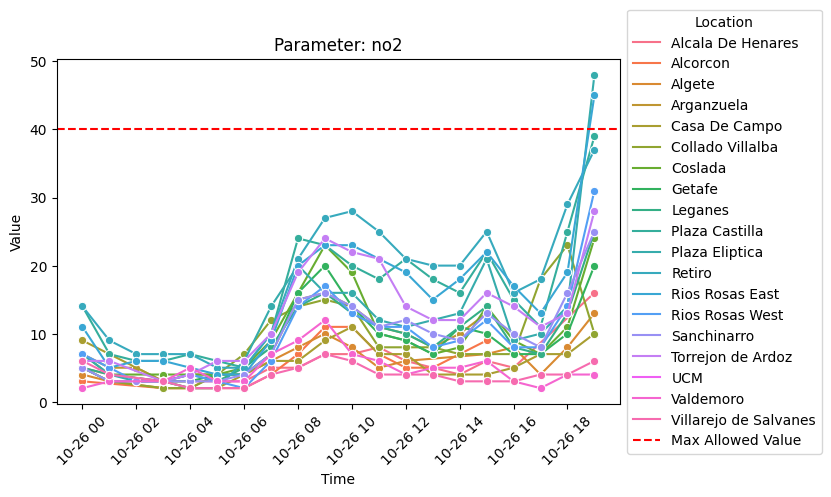

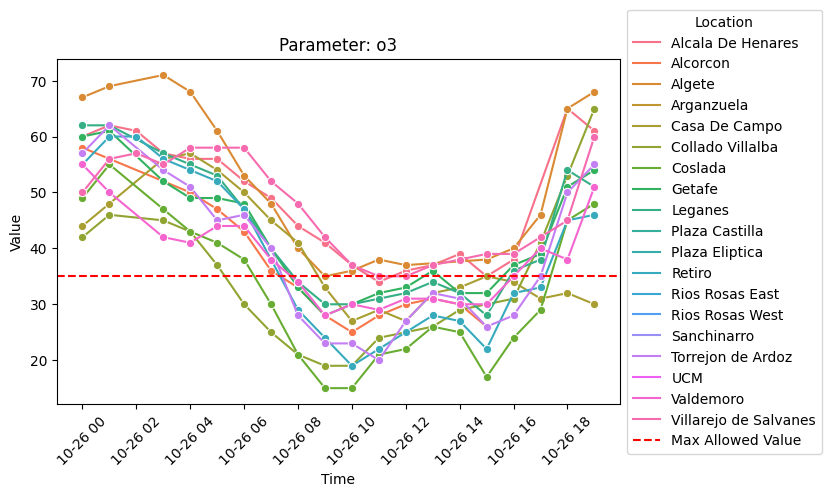

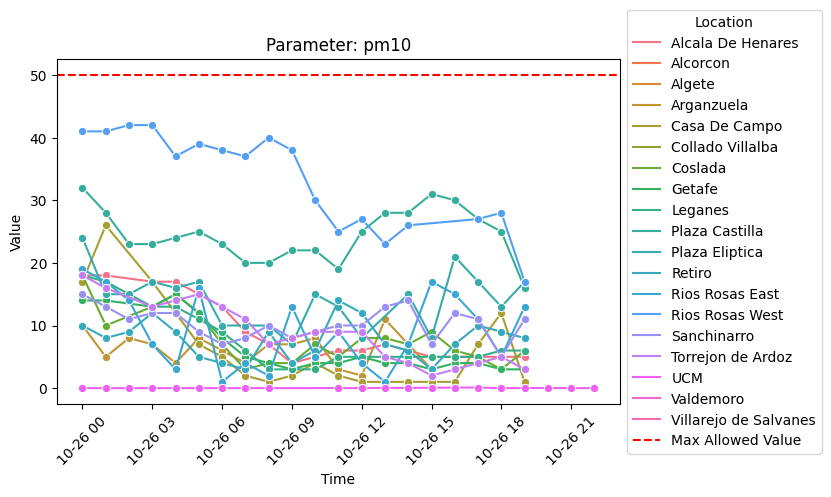

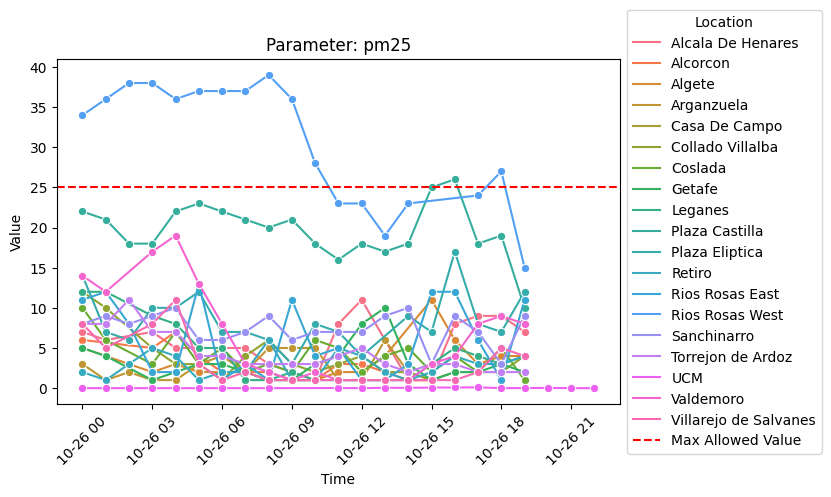

In [14]:
parameters = last_24_hours_pivot_df.columns[2:]  # Exclude the first two columns (locationName and localTime)

for parameter in parameters:
    plt.figure()
    sns.set_palette("husl")  # Set a color palette

    # localtime plotted on the graph (UTC) is two hours sooner than Madrid time.
    ax = sns.lineplot(data=last_24_hours_pivot_df, x='localTime', y=parameter, hue='locationName', marker='o')

    # Add a baseline indicating the maximum allowed value according to the law
    plt.axhline(max_allowed_values[parameter], color='red', linestyle='--', label='Max Allowed Value')

    plt.title(f'Parameter: {parameter}')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Position the legend to the right of the plot
    ax.legend(title='Location', loc='center left', bbox_to_anchor=(1, 0.5))

    # Save or display the plot
    # plt.savefig(f'{parameter}_plot.png')
    plt.show()

<h4>Data for the last one week</h4>

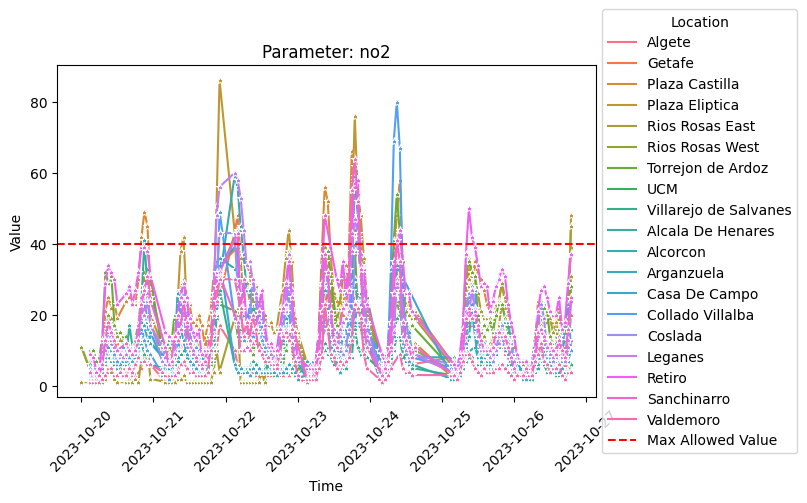

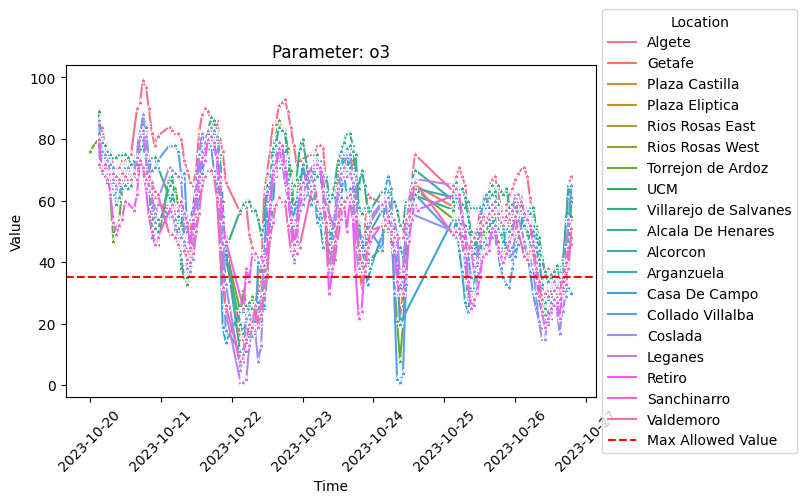

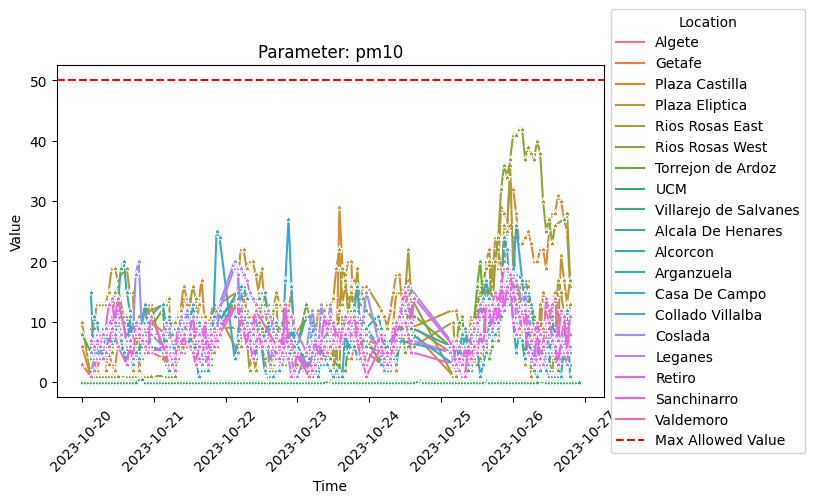

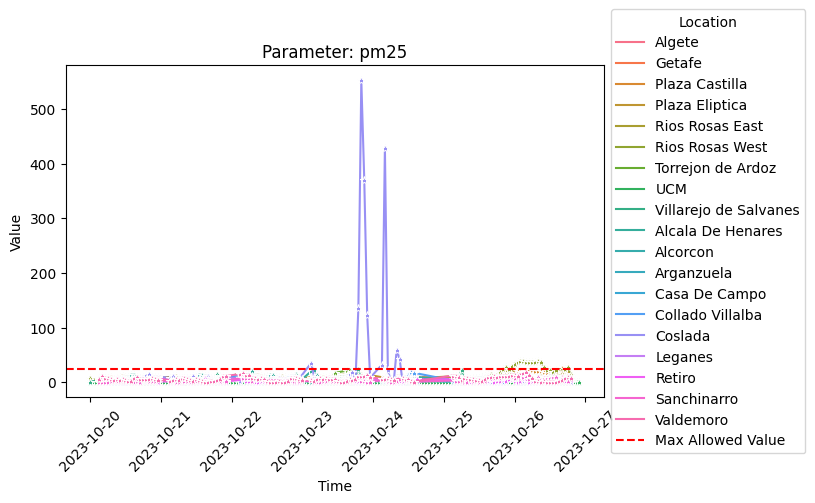

In [15]:
# Create a graph for each parameter with different colors for each location
parameters = last_1_week_pivot_df.columns[2:]  # Exclude the first two columns (locationName and localTime)

for parameter in parameters:
    plt.figure()
    sns.set_palette("husl")  # Set a color palette
    sns.lineplot(data=last_1_week_pivot_df, x='localTime', y=parameter, hue='locationName', marker='*')

    # Add a baseline indicating the maximum allowed value according to the law
    plt.axhline(max_allowed_values[parameter], color='red', linestyle='--', label='Max Allowed Value')

    plt.title(f'Parameter: {parameter}')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.legend(title='Location')

        # Position the legend to the right of the plot
    plt.legend(title='Location', loc='center left', bbox_to_anchor=(1, 0.5))


    # Save or display the plot
    # plt.savefig(f'{parameter}_plot.png')
    plt.show()


<h4> Average values by hour of the day (based on data of the past year. </h4>

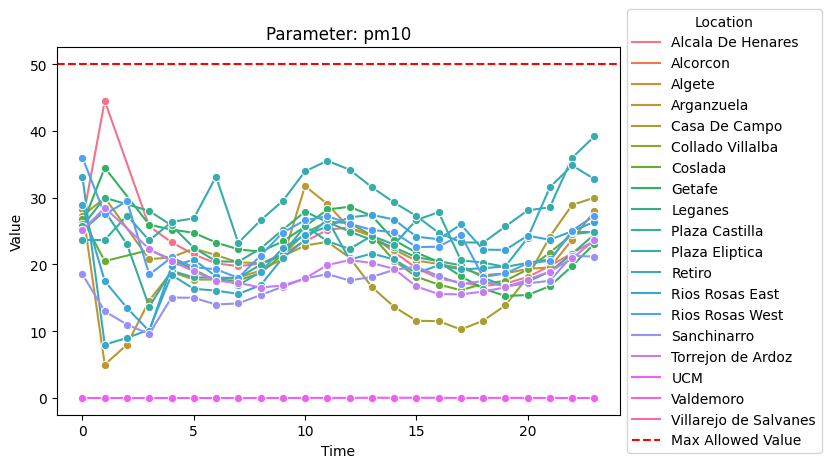

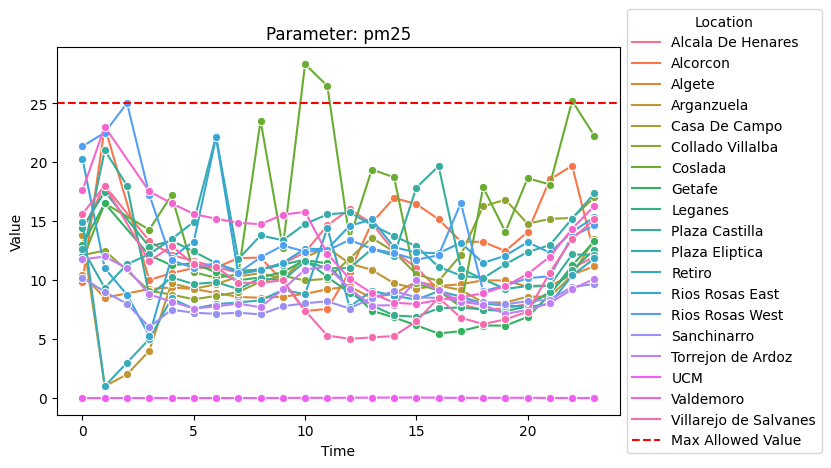

In [16]:
parameters = summary_by_hour_1_year_df.columns[2:]  # Exclude the first two columns (locationName and localTime)

for parameter in parameters:
    plt.figure()
    sns.set_palette("husl")  # Set a color palette

    # localtime plotted on the graph (UTC) is two hours sooner than Madrid time.
    ax = sns.lineplot(data=summary_by_hour_1_year_df, x='localTime', y=parameter, hue='locationName', marker='o')

    # Add a baseline indicating the maximum allowed value according to the law
    plt.axhline(max_allowed_values[parameter], color='red', linestyle='--', label='Max Allowed Value')

    plt.title(f'Parameter: {parameter}')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.xticks(rotation=0)
    plt.tight_layout()

    # Position the legend to the right of the plot
    ax.legend(title='Location', loc='center left', bbox_to_anchor=(1, 0.5))

    # Save or display the plot
    # plt.savefig(f'{parameter}_plot.png')
    plt.show()

<h3> Answer by User Request </h3>